<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/An%C3%A1lise_da_Din%C3%A2mica_da_Entropia_e_Tempo_Percebido_em_Sistemas_N%C3%A3o_Lineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

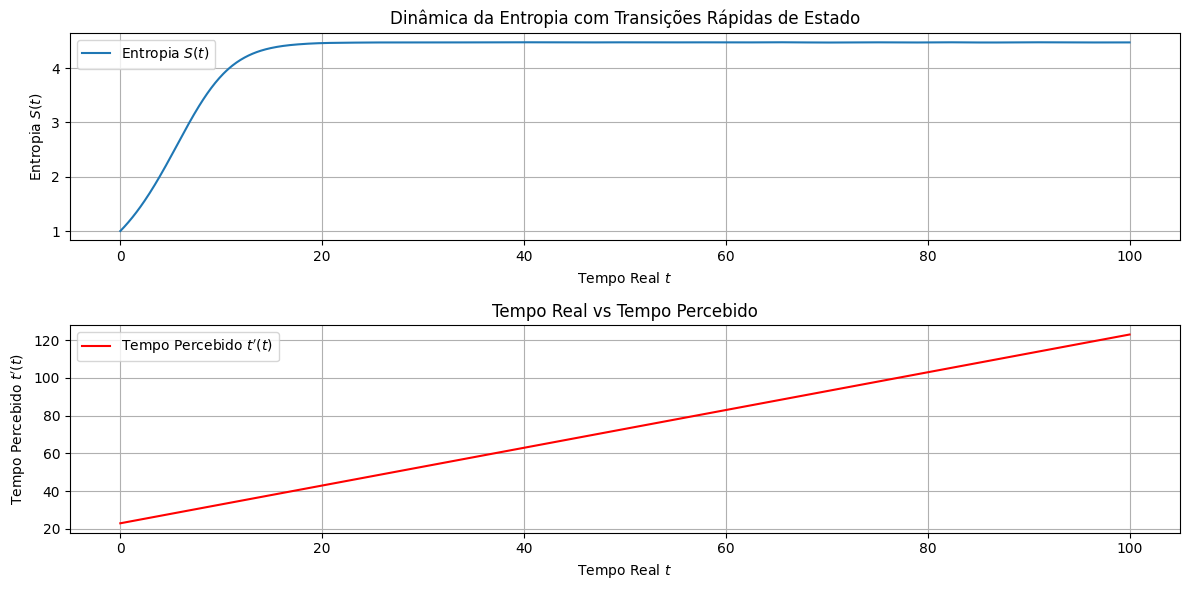

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parâmetros do modelo
gamma = 0.1  # Taxa de crescimento da informação
beta = 0.01  # Parâmetro do modelo não-linear
alpha = 0.2  # Parâmetro do modelo não-linear

# Equação diferencial para a entropia
def dS_dt(t, S):
    return alpha * S - beta * S**3

# Condição inicial
S0 = 1.0

# Intervalo de tempo
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver a equação diferencial
sol = solve_ivp(dS_dt, t_span, [S0], t_eval=t_eval)

# Definir a informação independentemente como uma função que cresce exponencialmente
I_indep = 10.0*np.exp(gamma * t_eval)

# Calcular o tempo percebido a partir da informação independente
t_percebido = np.log(I_indep) / gamma

# Plotar os resultados
plt.figure(figsize=(12, 6))

# Plotar a entropia
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label="Entropia $S(t)$")
plt.xlabel("Tempo Real $t$")
plt.ylabel("Entropia $S(t)$")
plt.title("Dinâmica da Entropia com Transições Rápidas de Estado")
plt.grid(True)
plt.legend()

# Plotar o tempo real vs tempo percebido
plt.subplot(2, 1, 2)
plt.plot(t_eval, t_percebido, label="Tempo Percebido $t'(t)$", color='r')
plt.xlabel("Tempo Real $t$")
plt.ylabel("Tempo Percebido $t'(t)$")
plt.title("Tempo Real vs Tempo Percebido")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
